# Importing Libraries

In [9]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

pd.options.display.max_columns=None
pd.options.display.max_rows=None

# import functions to perform scaling and normalization
from sklearn.preprocessing import StandardScaler

# import various functions from sklearn 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet


# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# import decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# EDA & Data Preprocessing

In [2]:
df=pd.read_csv('online_shoppers_intention.csv')

df.head()

Administrative  Administrative_Duration  Informational  \
0               0                 0.000000              0   
1               0                 0.000000              0   
2               0                 0.000000              0   
3               0                 0.000000              0   
4               0                 0.000000              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                0.000000               1                 0.000000   
1                0.000000               2                64.000000   
2                0.000000               1                 0.000000   
3                0.000000               2                 2.666667   
4                0.000000              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.200000   0.200000    0.000000    0.000000   Feb                 1   
1     0.000000   0.100000    0.000000    0.000000   Feb                 2   
2     0.200000   0.200000    0.000000    0.000000   Feb                 4   
3     0.050000   0.140000    0.000000    0.000000   Feb                 3   
4     0.020000   0.050000    0.000000    0.000000   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [11]:
np.sum(df1['BounceRates'])

273.61972120400003

In [3]:
df.shape

(12330, 18)

In [4]:
df1=df.copy()

In [5]:
df1.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [6]:
df1.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

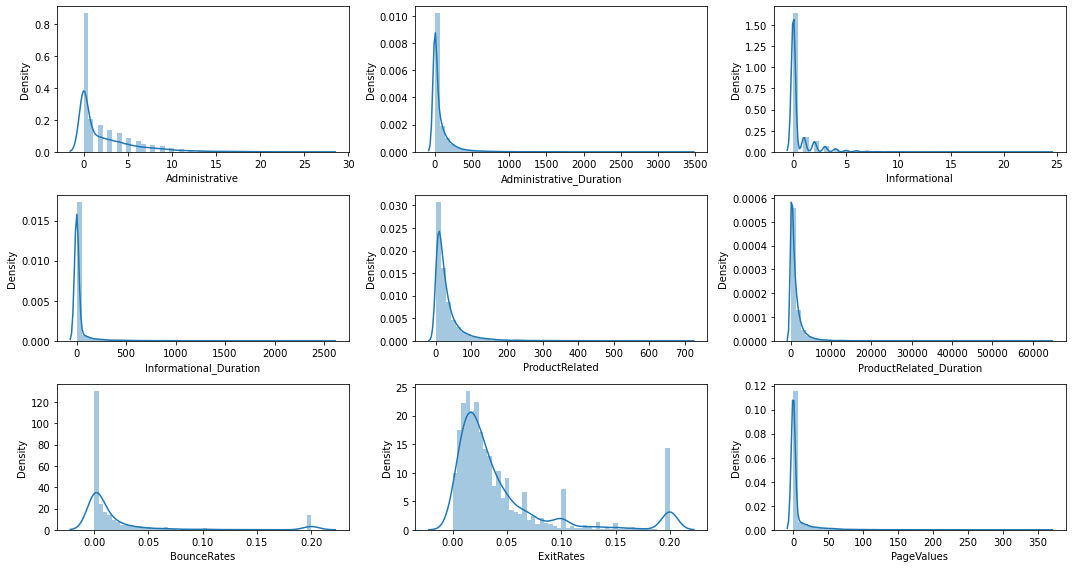

In [19]:
# distribution plots of continuous numerical variables


plt.figure(figsize=[15,8])


for i in range(1,10):
    plt.subplot(3,3,i)
    sns.distplot(a=df1[df1.columns[i-1]])
    

plt.tight_layout()   
plt.show()

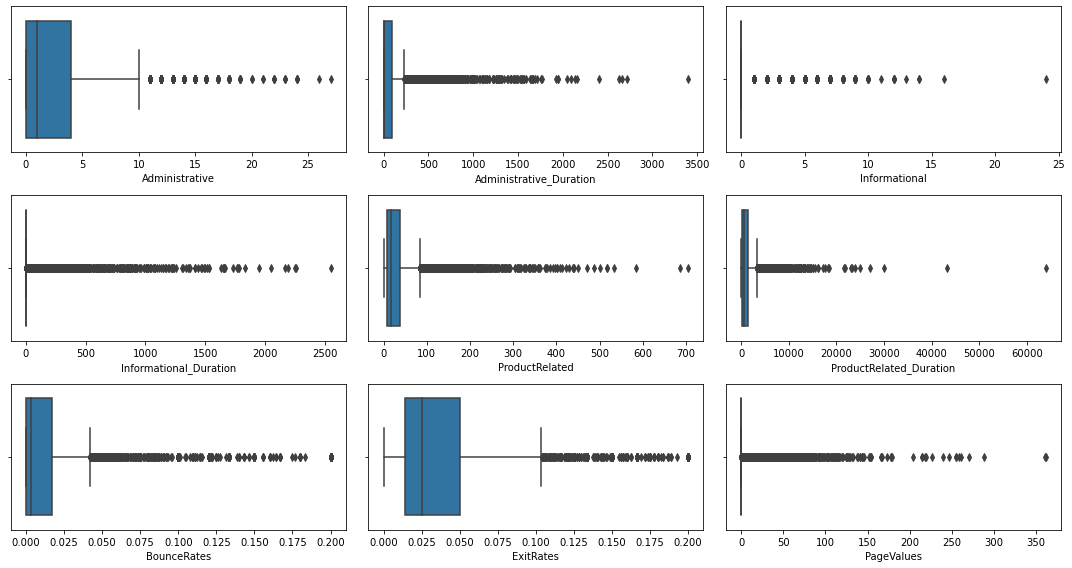

In [23]:
# box plots of continuous numerical variables

plt.figure(figsize=[15,8])


for i in range(1,10):
    plt.subplot(3,3,i)
    sns.boxplot(x=df1[df1.columns[i-1]])
    

plt.tight_layout()   
plt.show()

In [25]:
df1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [31]:
# removing outliers based on boxplots of continuos numerical variables shown above

a=df1[df1['Administrative']<25]

a=a[a['Administrative_Duration']<3000]

a=a[a['Informational']<20]

a=a[a['Informational_Duration']<2500]

a=a[a['ProductRelated']<650]

a=a[a['ProductRelated_Duration']<40000]

a=a[a['PageValues']<350]

In [33]:
df2=a.copy()

In [35]:
df2.shape

(12323, 18)

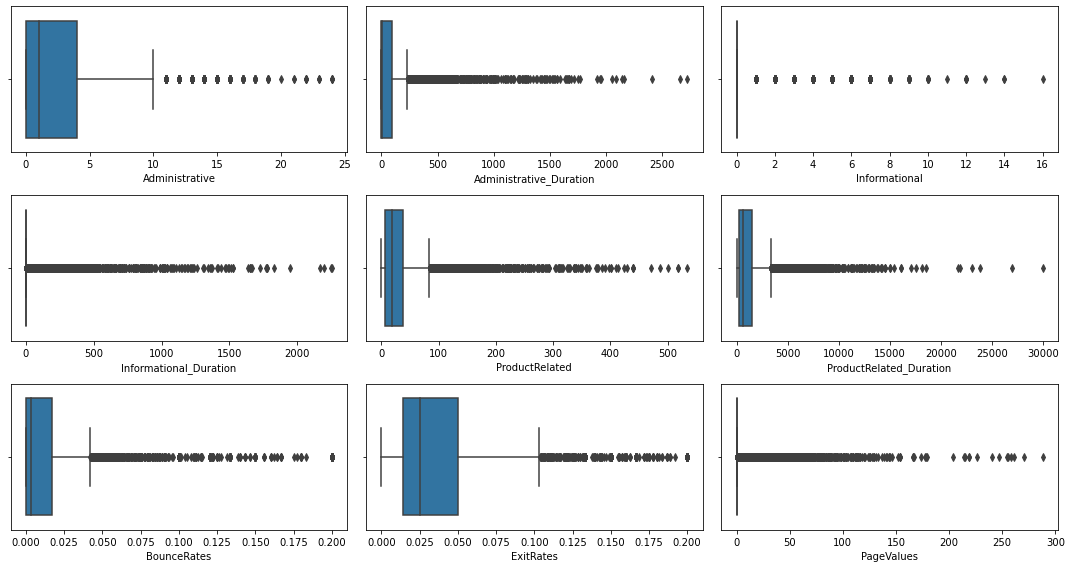

In [34]:
# box plots of continuous numerical variables after removing extreme outliers

plt.figure(figsize=[15,8])


for i in range(1,10):
    plt.subplot(3,3,i)
    sns.boxplot(x=df2[df2.columns[i-1]])
    

plt.tight_layout()   
plt.show()

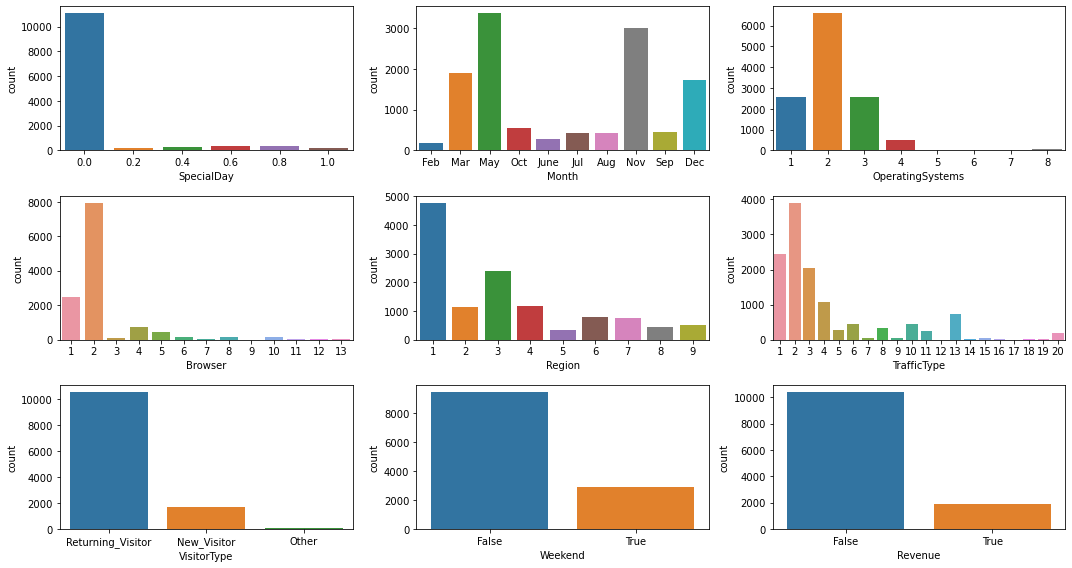

In [37]:
# countplot of categorical columns


plt.figure(figsize=[15,8])


for i in range(10,19):
    plt.subplot(3,3,i-9)
    sns.countplot(x=df2.columns[i-1],data=df2)
    

plt.tight_layout()   
plt.show()

In [36]:
# null values

df2.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [60]:
num=df2.iloc[:,0:9]
cat=df2.iloc[:,9:]

In [61]:
num.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues'],
      dtype='object')

In [62]:
cat.columns

Index(['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [63]:
cat.head()

SpecialDay Month  OperatingSystems  Browser  Region  TrafficType  \
0    0.000000   Feb                 1        1       1            1   
1    0.000000   Feb                 2        2       1            2   
2    0.000000   Feb                 4        1       9            3   
3    0.000000   Feb                 3        2       2            4   
4    0.000000   Feb                 3        3       1            4   

         VisitorType  Weekend  Revenue  
0  Returning_Visitor    False    False  
1  Returning_Visitor    False    False  
2  Returning_Visitor    False    False  
3  Returning_Visitor    False    False  
4  Returning_Visitor     True    False

In [64]:
cat.nunique()

SpecialDay           6
Month               10
OperatingSystems     8
Browser             13
Region               9
TrafficType         20
VisitorType          3
Weekend              2
Revenue              2
dtype: int64

In [65]:
# dropping columns which are not required for further analysis

cat.drop(['Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType'],axis=1,inplace=True)

In [66]:
cat.columns

Index(['SpecialDay', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

In [67]:
cat.head()

SpecialDay        VisitorType  Weekend  Revenue
0    0.000000  Returning_Visitor    False    False
1    0.000000  Returning_Visitor    False    False
2    0.000000  Returning_Visitor    False    False
3    0.000000  Returning_Visitor    False    False
4    0.000000  Returning_Visitor     True    False

In [68]:
target=cat['Revenue']

target=pd.DataFrame(target)

target.head()

Revenue
0    False
1    False
2    False
3    False
4    False

In [69]:
cat.drop(['Revenue'],axis=1,inplace=True)

In [70]:
cat.head()

SpecialDay        VisitorType  Weekend
0    0.000000  Returning_Visitor    False
1    0.000000  Returning_Visitor    False
2    0.000000  Returning_Visitor    False
3    0.000000  Returning_Visitor    False
4    0.000000  Returning_Visitor     True

In [71]:
cat['Weekend']=cat['Weekend'].replace({False:0,True:1})
target['Revenue']=target['Revenue'].replace({False:0,True:1})

In [72]:
cat.head()

SpecialDay        VisitorType  Weekend
0    0.000000  Returning_Visitor        0
1    0.000000  Returning_Visitor        0
2    0.000000  Returning_Visitor        0
3    0.000000  Returning_Visitor        0
4    0.000000  Returning_Visitor        1

In [73]:
cat['Weekend'].value_counts(normalize=True)

0   0.767346
1   0.232654
Name: Weekend, dtype: float64

In [74]:
target['Revenue'].value_counts(normalize=True)

0   0.845411
1   0.154589
Name: Revenue, dtype: float64

In [75]:
# dataframe for pairplot


num_pairplot=pd.concat([num,target],axis=1)

<Figure size 1080x576 with 0 Axes>

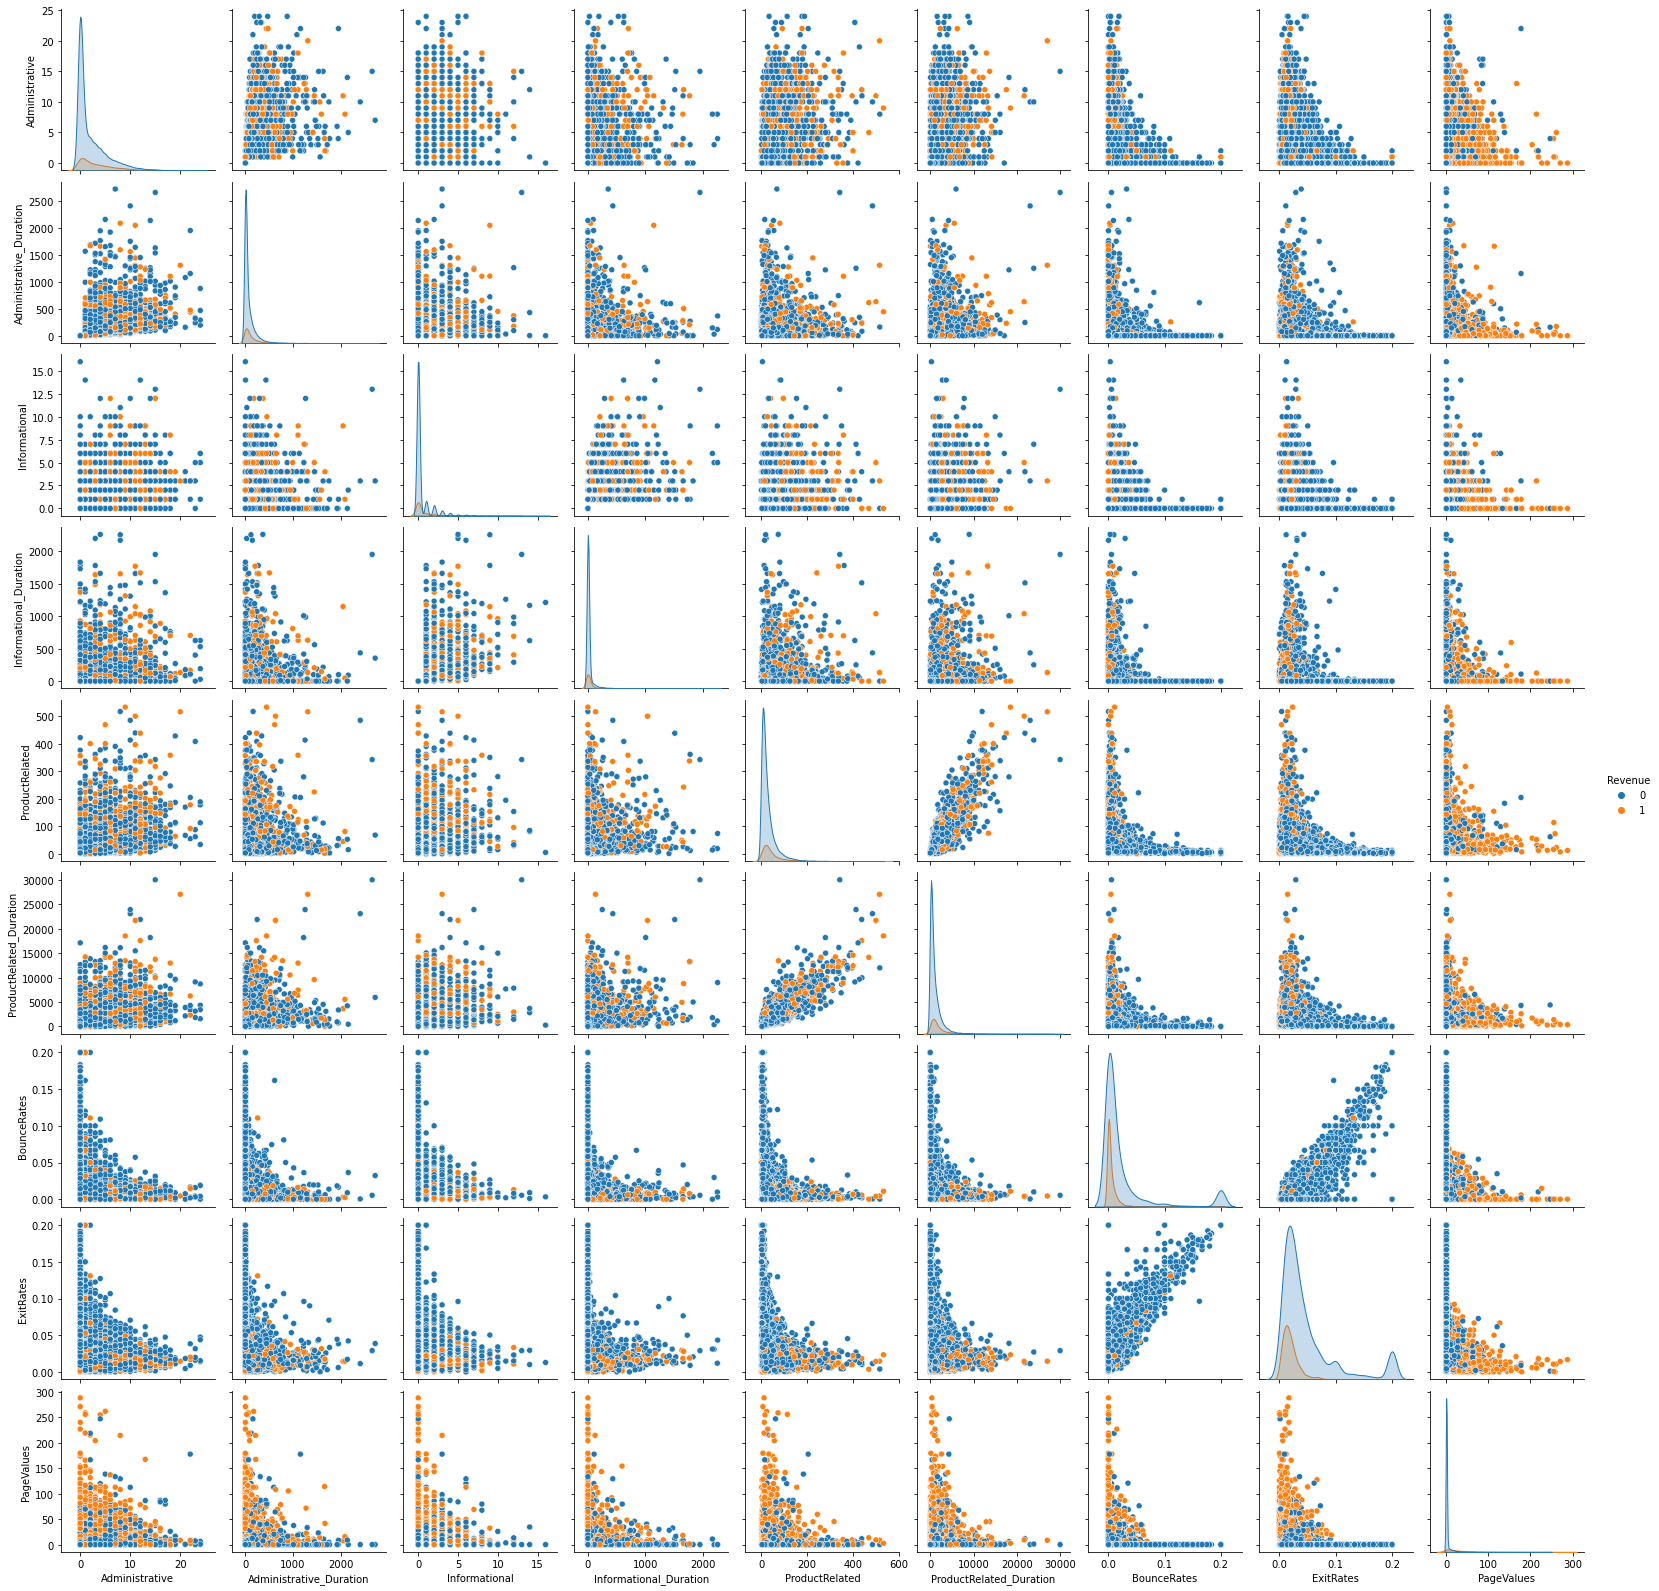

In [77]:
# bivariate analysis

plt.figure(figsize=[15,8])

sns.pairplot(data=num_pairplot,hue='Revenue')

plt.show()

In [83]:
# standardize

ss=StandardScaler()

num_stand=pd.DataFrame(data=ss.fit_transform(num),columns=num.columns)

num_stand.head()

Administrative  Administrative_Duration  Informational  \
0       -0.699212                -0.465787      -0.400633   
1       -0.699212                -0.465787      -0.400633   
2       -0.699212                -0.465787      -0.400633   
3       -0.699212                -0.465787      -0.400633   
4       -0.699212                -0.465787      -0.400633   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.247286       -0.706691                -0.670220   
1               -0.247286       -0.683546                -0.633928   
2               -0.247286       -0.706691                -0.670220   
3               -0.247286       -0.683546                -0.668708   
4               -0.247286       -0.498384                -0.314390   

   BounceRates  ExitRates  PageValues  
0     3.666089   3.228398   -0.323786  
1    -0.457784   1.170930   -0.323786  
2     3.666089   3.228398   -0.323786  
3     0.573184   1.993917   -0.323786  
4    -0.045397   0.142196   -0.323786

# KMeans Clustering

In [88]:
# optimal number of clusters using silhouete score method

for K in range(2,21):
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(num_stand)
    score = silhouette_score(num_stand, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.47185024331067227)
For 3 clusters the silhouette score is 0.48849756283597273)
For 4 clusters the silhouette score is 0.4011188884258434)
For 5 clusters the silhouette score is 0.41780592465978605)
For 6 clusters the silhouette score is 0.42085838434693396)
For 7 clusters the silhouette score is 0.3740232789691504)
For 8 clusters the silhouette score is 0.36190037944174847)
For 9 clusters the silhouette score is 0.3645630836925672)
For 10 clusters the silhouette score is 0.2982109678786228)
For 11 clusters the silhouette score is 0.30546951591545335)
For 12 clusters the silhouette score is 0.3057548901016649)
For 13 clusters the silhouette score is 0.30154714869877813)
For 14 clusters the silhouette score is 0.3084764412248125)
For 15 clusters the silhouette score is 0.30488098409298103)
For 16 clusters the silhouette score is 0.30743287207770015)
For 17 clusters the silhouette score is 0.30107277813342675)
For 18 clusters the silhouette score i

optimal number of clusters is 3, as silhouete score is high for that.

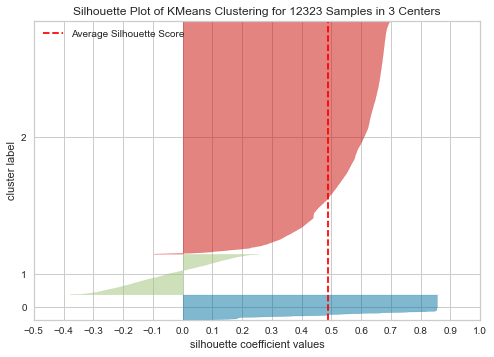

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 12323 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=10))

In [98]:
from yellowbrick.cluster import silhouette_visualizer

silhouette_visualizer(KMeans(n_clusters =3,random_state=10),num_stand, colors = 'yellowbrick')

since there are many outliers in the cluster label 1 , but we are getting high silhouete score for number of clusters is equal to 3, so let us use more rigorous way of removing outliers from the data.

In [99]:
num_stand.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues'],
      dtype='object')

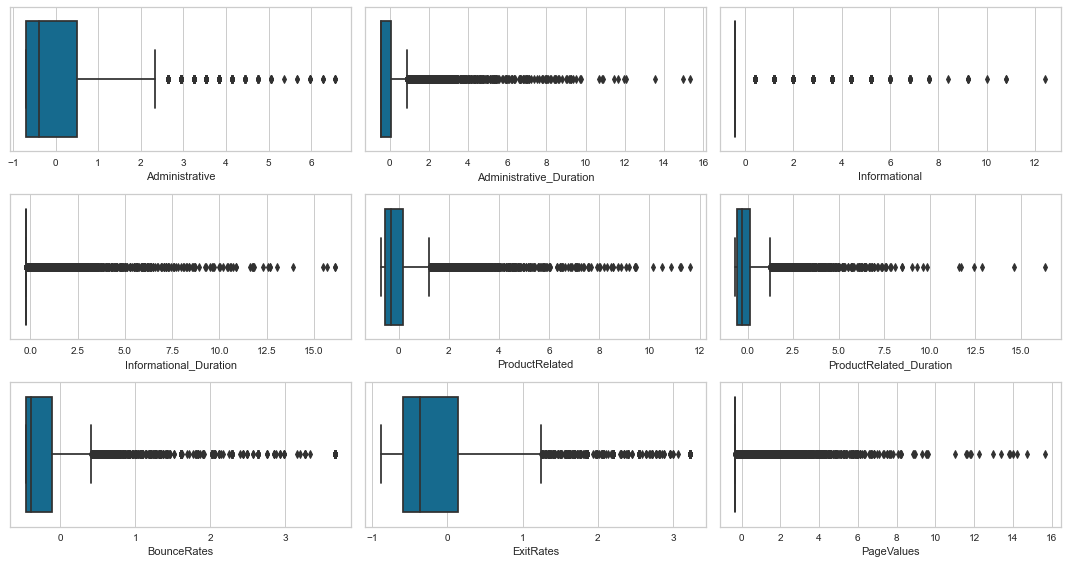

In [100]:
# box plots

plt.figure(figsize=[15,8])


for i in range(1,10):
    plt.subplot(3,3,i)
    sns.boxplot(x=num_stand[num_stand.columns[i-1]])
    

plt.tight_layout()   
plt.show()

In [128]:
num_stand1=num_stand.copy()

In [129]:
q1=num_stand.quantile(0.25)
q3=num_stand.quantile(0.75)
iqr=q3-q1

num_stand1=num_stand1[~((num_stand1<(q1-(1.5*iqr)))|(num_stand1>(q3+(1.5*iqr)))).any(axis=1)]

num_stand1.shape

(5880, 9)

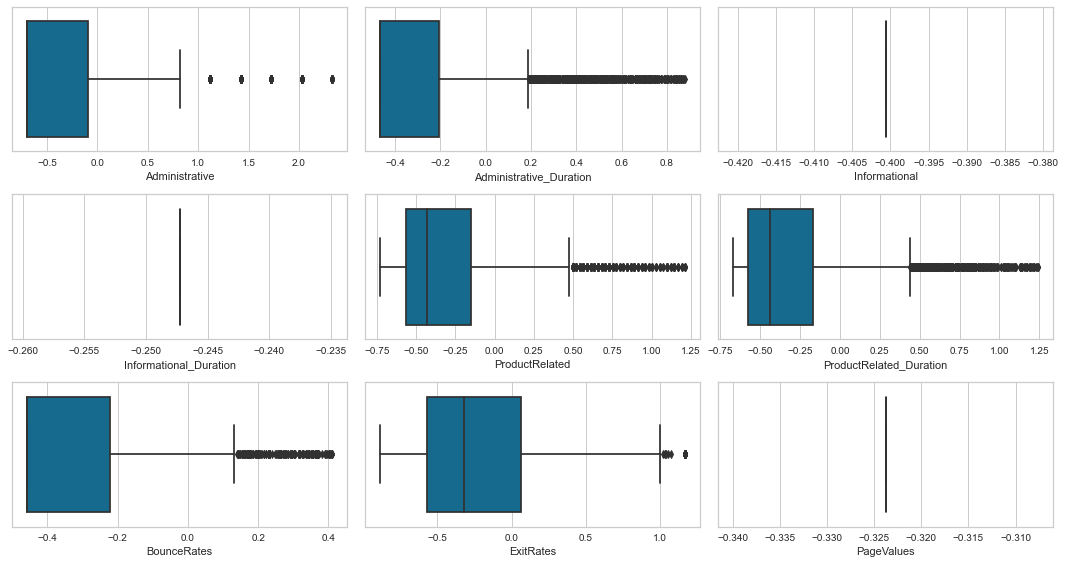

In [130]:
# box plots

plt.figure(figsize=[15,8])


for i in range(1,10):
    plt.subplot(3,3,i)
    sns.boxplot(x=num_stand1[num_stand1.columns[i-1]])
    

plt.tight_layout()   
plt.show()

In [133]:
# optimal number of clusters using silhouete score method

for K in range(2,11):
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(num_stand1)
    score = silhouette_score(num_stand1, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.36928718467988664)
For 3 clusters the silhouette score is 0.28473112972920456)
For 4 clusters the silhouette score is 0.3088599437966289)
For 5 clusters the silhouette score is 0.30314277524477323)
For 6 clusters the silhouette score is 0.2645584713292424)
For 7 clusters the silhouette score is 0.2588202212459345)
For 8 clusters the silhouette score is 0.27860985847579145)
For 9 clusters the silhouette score is 0.262432104811717)
For 10 clusters the silhouette score is 0.25302334364790674)


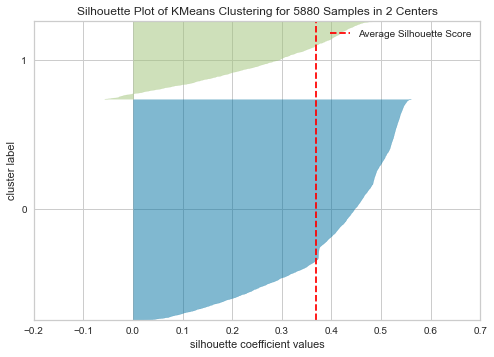

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 5880 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, random_state=10))

In [134]:
silhouette_visualizer(KMeans(n_clusters =2,random_state=10),num_stand1, colors = 'yellowbrick')

now we see optimal number of clusters as 2 after removing rigorously removing outliers in the data

In [140]:
# build a K-Means model with 5 clusters
new_clusters1 = KMeans(n_clusters = 2, random_state = 10)

# fit the model
new_clusters1.fit(num_stand1)

# append the cluster label for each point in the dataframe 'df_cust'
num_stand1['Cluster'] = new_clusters1.labels_

In [141]:
num_stand1.head()

Administrative  Administrative_Duration  Informational  \
1       -0.699212                -0.465787      -0.400633   
4       -0.699212                -0.465787      -0.400633   
5       -0.699212                -0.465787      -0.400633   
8       -0.699212                -0.465787      -0.400633   
9       -0.699212                -0.465787      -0.400633   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
1               -0.247286       -0.683546                -0.633928   
4               -0.247286       -0.498384                -0.314390   
5               -0.247286       -0.290077                -0.582770   
8               -0.247286       -0.683546                -0.649239   
9               -0.247286       -0.660401                -0.251730   

   BounceRates  ExitRates  PageValues  Cluster  
1    -0.457784   1.170930   -0.323786        0  
4    -0.045397   0.142196   -0.323786        0  
5    -0.132215  -0.381195   -0.323786        0  
8    -0.457784   1.170930   -0.323786        0  
9    -0.457784  -0.429322   -0.323786        0

In [144]:
num_stand1['Cluster'].value_counts(normalize=True)

0   0.739966
1   0.260034
Name: Cluster, dtype: float64

<Figure size 1080x576 with 0 Axes>

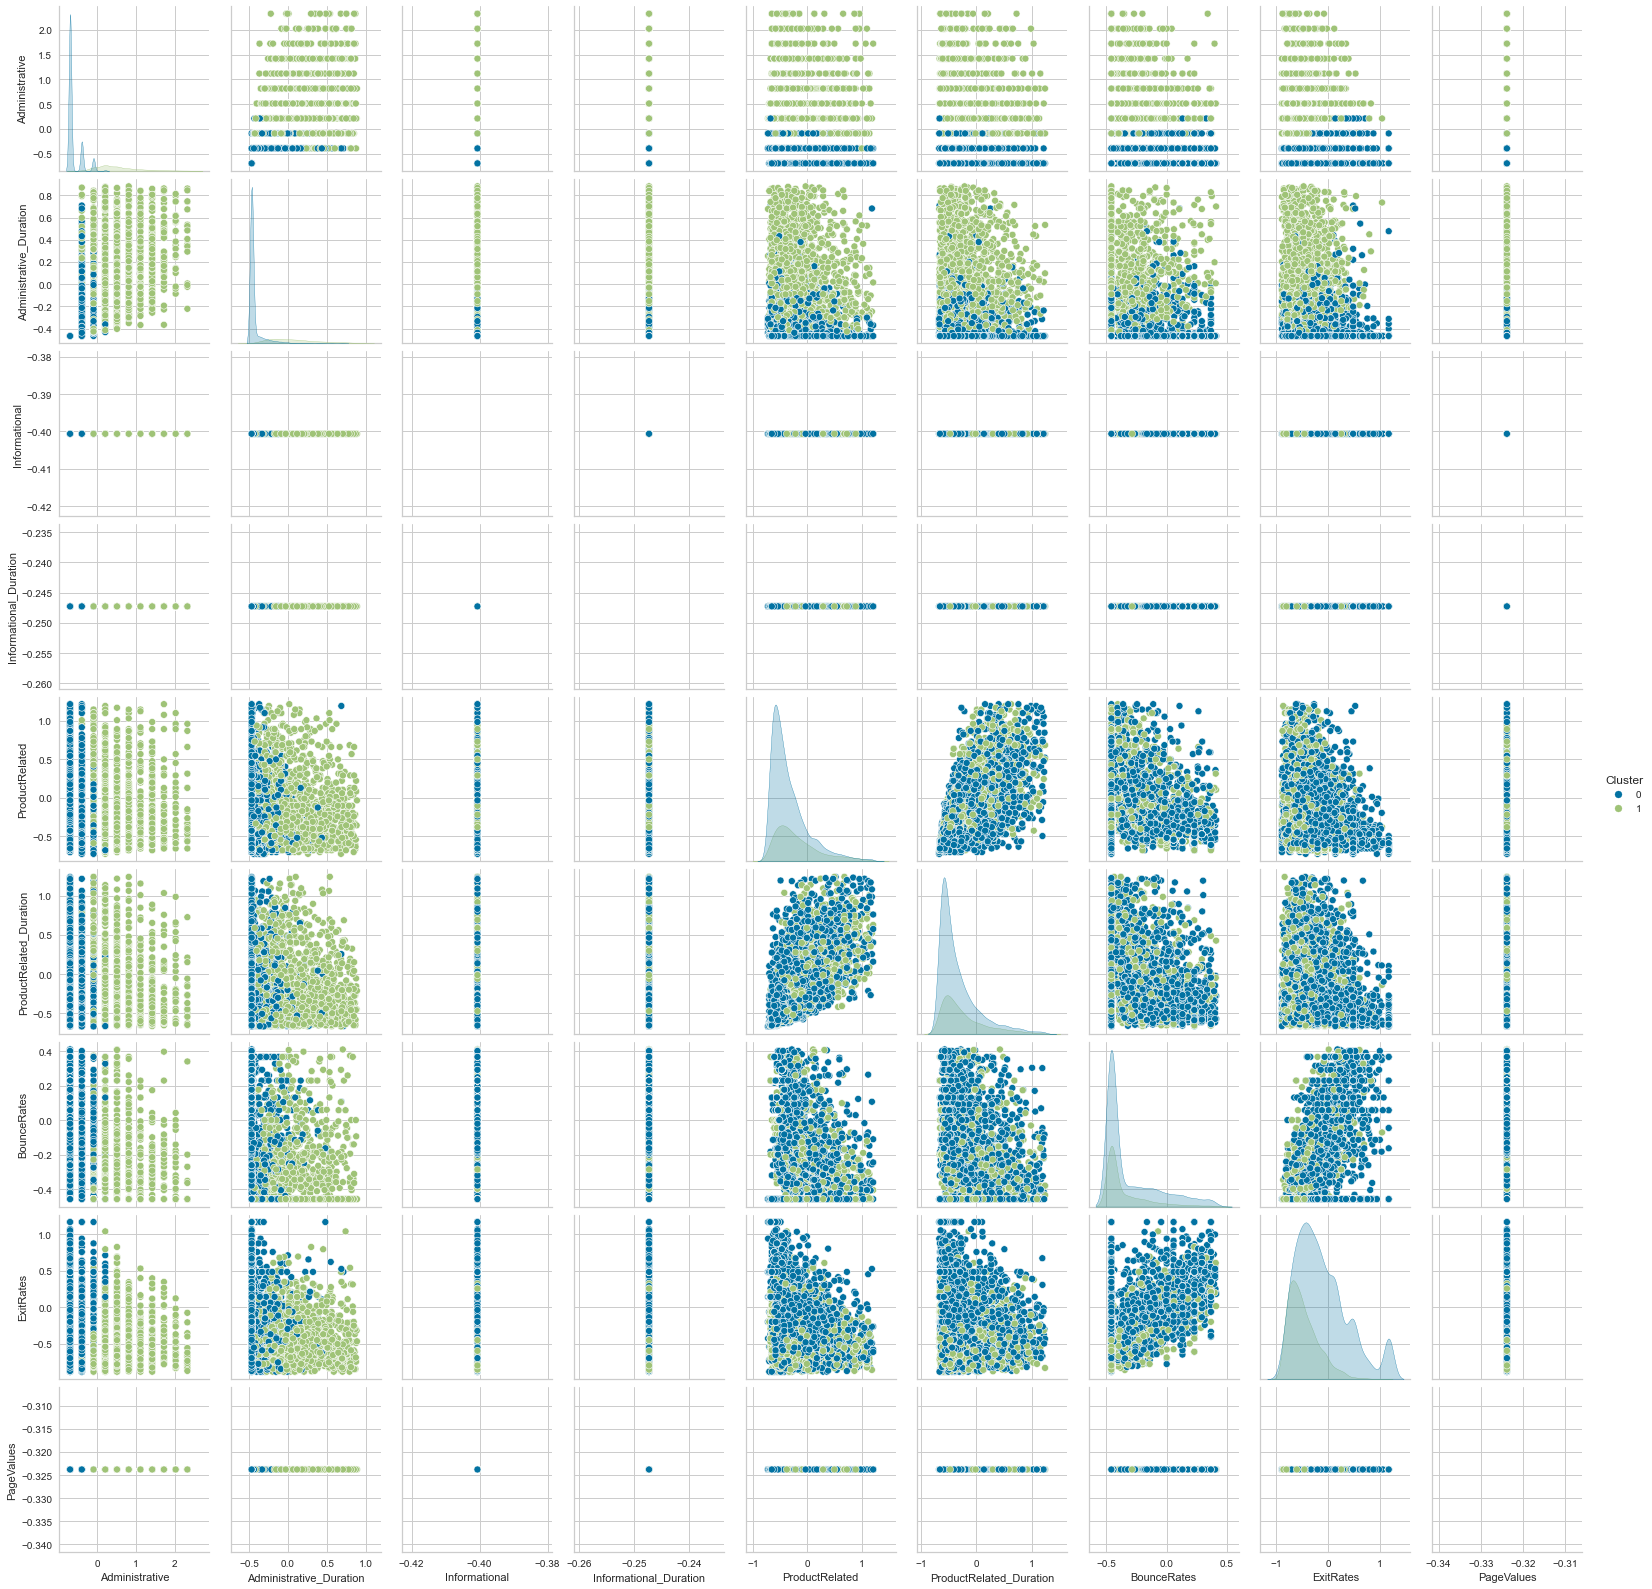

In [142]:
# bivariate analysis

plt.figure(figsize=[15,8])

sns.pairplot(data=num_stand1,hue='Cluster')

plt.show()

# PCA

In [146]:
num_stand1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'Cluster'],
      dtype='object')

In [171]:
num_stand2=num_stand1.drop('Cluster',axis=1)

In [172]:
num_stand2.head()

Administrative  Administrative_Duration  Informational  \
1       -0.699212                -0.465787      -0.400633   
4       -0.699212                -0.465787      -0.400633   
5       -0.699212                -0.465787      -0.400633   
8       -0.699212                -0.465787      -0.400633   
9       -0.699212                -0.465787      -0.400633   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
1               -0.247286       -0.683546                -0.633928   
4               -0.247286       -0.498384                -0.314390   
5               -0.247286       -0.290077                -0.582770   
8               -0.247286       -0.683546                -0.649239   
9               -0.247286       -0.660401                -0.251730   

   BounceRates  ExitRates  PageValues  
1    -0.457784   1.170930   -0.323786  
4    -0.045397   0.142196   -0.323786  
5    -0.132215  -0.381195   -0.323786  
8    -0.457784   1.170930   -0.323786  
9    -0.457784  -0.429322   -0.323786

In [173]:
cov_mat = np.cov(num_stand2.T)

print(cov_mat[0:5])

[[ 3.58706935e-01  1.36196893e-01  0.00000000e+00 -4.19321369e-34
   3.67390961e-02  1.88361477e-02 -8.21177265e-03 -8.48285137e-02
   0.00000000e+00]
 [ 1.36196893e-01  8.58669769e-02  0.00000000e+00  1.13216770e-34
   1.24861820e-02  8.11143561e-03 -3.75065367e-03 -3.99899625e-02
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-4.19321369e-34  1.13216770e-34  0.00000000e+00  7.70503016e-34
   2.60503401e-34 -3.60616377e-34  1.19296930e-33 -8.34449524e-34
   0.00000000e+00]
 [ 3.67390961e-02  1.24861820e-02  0.00000000e+00  2.60503401e-34
   1.41183967e-01  1.02711761e-01  7.44771993e-03 -6.45176615e-02
   0.00000000e+00]]


In [174]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [4.78780327e-01 2.64800452e-01 1.65569192e-01 2.85299991e-02
 3.63220881e-02 4.02956486e-02 5.16459001e-19 0.00000000e+00
 0.00000000e+00] 

Eigenvectors: 
 
 [[-7.82665647e-01 -4.57873823e-01  1.85683267e-01  3.59341268e-01
   1.19085126e-01 -5.97897892e-04 -1.64159101e-17  0.00000000e+00
   0.00000000e+00]
 [-3.27307908e-01 -1.85098854e-01  4.33187811e-02 -8.74209695e-01
  -2.92041448e-01  8.48565447e-02  3.55687178e-17  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00]
 [ 3.90223474e-19 -7.14072446e-18 -3.23326825e-17  5.77460742e-17
  -7.19214930e-17  2.68005347e-16  1.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-2.34840418e-01  5.19158270e-01  3.78787435e-01 -2.26571339e-01
   5.43579307e-01 -4.30153129e-01  1.60216473e-16  0.00000000e+00
   0.00000000e+00]
 [-1.82023065e-01  5.23041527e-01  4.57635959e-01  1.64919366e-01
  -

In [175]:
# create a list of eigenvalues
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order
eig_val.sort(reverse = True)

# print the sorted list
print(eig_val)

[0.4787803266163423, 0.26480045150308257, 0.16556919220728594, 0.04029564862232306, 0.03632208813835005, 0.02852999908767844, 5.164590011759573e-19, 0.0, 0.0]


In [176]:
# calculate the percentage of variation explained by each principal component
# create an empty list to store the percentage of variation explained by each principal component
percent_var = []

# use a 'for' loop to calculate the percentage of variation for each component
for i in eig_val:
    variation = (i/sum(eig_val))*100
    
    # add the values to the list 'percent_var'
    percent_var.append(variation)
    
# print the percentage of variation
percent_var

[47.203136091259914,
 26.106778107746152,
 16.323530182440305,
 3.9727634576123405,
 3.5810086049904815,
 2.812783555950813,
 5.091789107199453e-17,
 0.0,
 0.0]

In [177]:
# the 'cumsum()' returns the cumulative sum 
np.cumsum(percent_var)

array([ 47.20313609,  73.3099142 ,  89.63344438,  93.60620784,
        97.18721644, 100.        , 100.        , 100.        ,
       100.        ])

5 principal components explain 97.2% variation in the data

In [178]:
pca = PCA(n_components = 5, random_state = 10)

components = pca.fit_transform(num_stand2)

num_stand2_pca = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

num_stand2_pca.head()

PC1       PC2       PC3       PC4       PC5
0 -1.099534 -0.792609  0.593768  0.258643 -0.281936
1 -0.569604 -0.063786  0.171437 -0.074547  0.207495
2 -0.337398  0.147116 -0.279163 -0.322775  0.034303
3 -1.102321 -0.800617  0.586762  0.250234 -0.287964
4 -0.327515  0.157073 -0.392842  0.238999  0.166178

# Applying clustering after pca

In [179]:
# optimal number of clusters using silhouete score method

for K in range(2,11):
    cluster1 = KMeans (n_clusters= K, random_state= 10)
    predict = cluster1.fit_predict(num_stand2_pca)
    score = silhouette_score(num_stand2_pca, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.3736640526006568)
For 3 clusters the silhouette score is 0.29515447343207213)
For 4 clusters the silhouette score is 0.32028599466538504)
For 5 clusters the silhouette score is 0.315277005135515)
For 6 clusters the silhouette score is 0.26897504185873217)
For 7 clusters the silhouette score is 0.28110100425267015)
For 8 clusters the silhouette score is 0.29272866378508544)
For 9 clusters the silhouette score is 0.28081499872670684)
For 10 clusters the silhouette score is 0.26701911272411616)


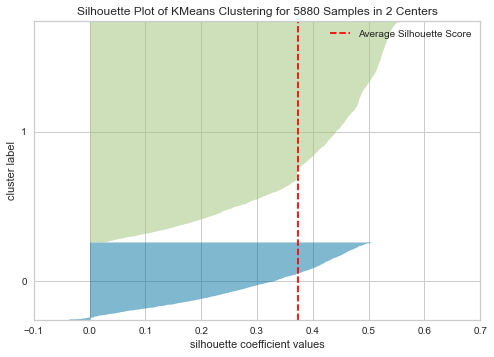

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 5880 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, random_state=10))

In [180]:
silhouette_visualizer(KMeans(n_clusters =2,random_state=10),num_stand2_pca, colors = 'yellowbrick')

In [182]:
# build a K-Means model with 5 clusters
new_clusters2 = KMeans(n_clusters = 2, random_state = 10)

# fit the model
new_clusters2.fit(num_stand2_pca)

# append the cluster label for each point in the dataframe 'df_cust'
num_stand2_pca['Cluster'] = new_clusters2.labels_

In [183]:
num_stand2_pca.head()

PC1       PC2       PC3       PC4       PC5  Cluster
0 -1.099534 -0.792609  0.593768  0.258643 -0.281936        0
1 -0.569604 -0.063786  0.171437 -0.074547  0.207495        0
2 -0.337398  0.147116 -0.279163 -0.322775  0.034303        0
3 -1.102321 -0.800617  0.586762  0.250234 -0.287964        0
4 -0.327515  0.157073 -0.392842  0.238999  0.166178        0

In [184]:
num_stand2_pca['Cluster'].value_counts(normalize=True)

0   0.739966
1   0.260034
Name: Cluster, dtype: float64

<Figure size 1080x576 with 0 Axes>

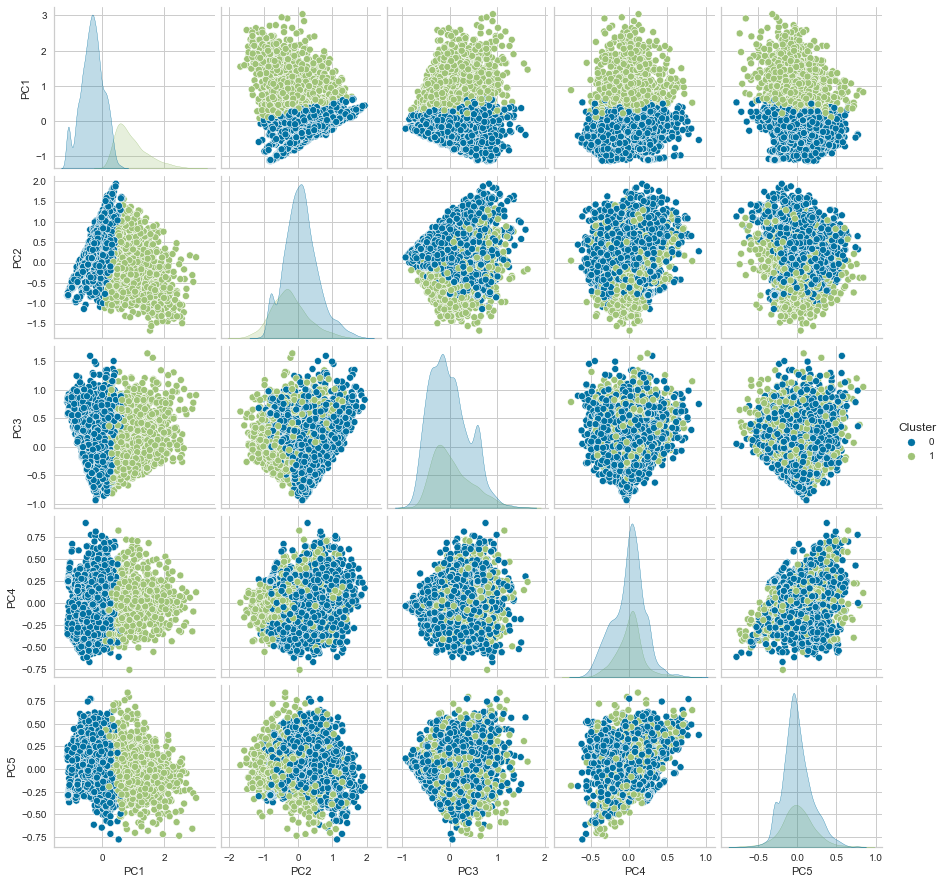

In [185]:
# bivariate analysis after applying pca

plt.figure(figsize=[15,8])

sns.pairplot(data=num_stand2_pca,hue='Cluster')

plt.show()

we see after applying pca clusters have been separated for most of the prinicipal components compared to before applying pca

In [190]:
cluster1=num_stand2_pca[num_stand2_pca['Cluster']==0]
cluster2=num_stand2_pca[num_stand2_pca['Cluster']==1]

In [191]:
cluster1.describe()

PC1         PC2         PC3         PC4         PC5     Cluster
count 4351.000000 4351.000000 4351.000000 4351.000000 4351.000000 4351.000000
mean    -0.331633    0.084305   -0.015078   -0.002946   -0.001331    0.000000
std      0.359194    0.483368    0.406547    0.207655    0.183938    0.000000
min     -1.132048   -1.141488   -0.934183   -0.666681   -0.775013    0.000000
25%     -0.558215   -0.235066   -0.338442   -0.130518   -0.113204    0.000000
50%     -0.324193    0.060866   -0.075891    0.018391   -0.022604    0.000000
75%     -0.089438    0.355073    0.255769    0.121435    0.098863    0.000000
max      0.640569    1.938894    1.591178    0.912021    0.774729    0.000000

In [192]:
cluster2.describe()

PC1         PC2         PC3         PC4         PC5     Cluster
count 1529.000000 1529.000000 1529.000000 1529.000000 1529.000000 1529.000000
mean     0.943711   -0.239901    0.042906    0.008383    0.003788    1.000000
std      0.520064    0.525205    0.404983    0.179402    0.208355    0.000000
min      0.082639   -1.673631   -0.813606   -0.756068   -0.733995    1.000000
25%      0.547664   -0.609577   -0.266515   -0.091321   -0.120548    1.000000
50%      0.807331   -0.291858   -0.047041    0.019923   -0.003255    1.000000
75%      1.208654    0.069541    0.299395    0.096395    0.125567    1.000000
max      3.038118    1.561124    1.635136    0.825993    0.842233    1.000000

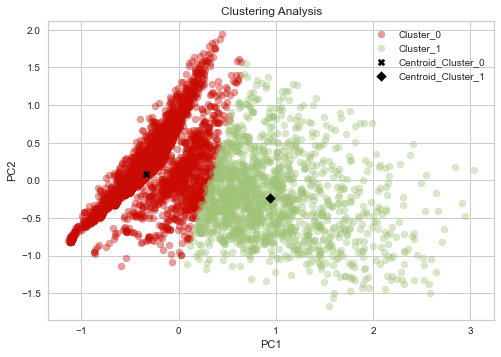

In [193]:
plt.scatter(cluster1.iloc[:, 0],cluster1.iloc[:, 1], c = 'r', label = 'Cluster_0', alpha = 0.4)
plt.scatter(cluster2.iloc[:, 0],cluster2.iloc[:, 1], c = 'g', label = 'Cluster_1', alpha = 0.4)
plt.scatter(new_clusters2.cluster_centers_[0][0],new_clusters2.cluster_centers_[0][1], c = 'black', label = 'Centroid_Cluster_0', marker = 'X')
plt.scatter(new_clusters2.cluster_centers_[1][0],new_clusters2.cluster_centers_[1][1], c = 'black', label = 'Centroid_Cluster_1', marker = 'D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Analysis')
plt.legend()
plt.show()


higher pc1 corresponds to cluster1 and lower pc1 corresponds to cluster0